In [43]:
# import required libries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
# define required path
raw_data = '../../data/raw/'
curated_data = '../../data/curated/'

In [44]:
conditions = pd.read_csv(curated_data + 'final_table.csv',index_col = 0) 

In [45]:
del conditions['2021 rent']
del conditions['2018_income']

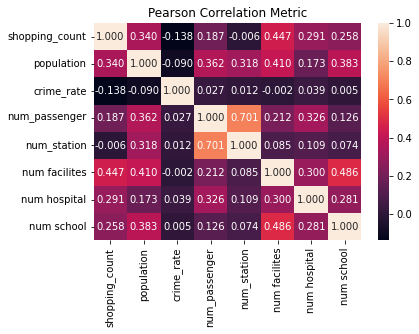

In [46]:
#delete the tips with less correlation with wait cost
# From tut02 written by Calvin and Akira
# check correlation between attributes
sns.heatmap(conditions.corr(),annot=True,fmt='.3f')

plt.title('Pearson Correlation Metric')
plt.show()

In [47]:
# discard this attribute due to the high correlation with the number of station
del conditions['num_passenger']

In [48]:
attributes = ['shopping_count', 'population', 'crime_rate', 'num_station', 'num facilites', 'num hospital', 'num school']
for feature_name in attributes:
    max_value = conditions[feature_name].max()
    min_value = conditions[feature_name].min()
    conditions[feature_name] = (conditions[feature_name] - min_value) / (max_value - min_value)

In [51]:
conditions.to_csv(curated_data + 'normalized_data.csv')